# Batch Gradient Descent

Batch Gradient Descent is a fundamental optimization algorithm used in machine learning to minimize the cost function. It updates model parameters by computing the gradient of the cost function with respect to all training examples simultaneously in each iteration. The algorithm:

- Uses entire dataset for each parameter update
- Updates weights using learning rate and computed gradients
- Iteratively minimizes the cost function
- Guarantees convergence to global minimum for convex optimization problems

The implementation includes:
- `learning_rate`: Step size for parameter updates
- `iterations`: Number of complete passes over the training data
- `theta`: Model parameters/weights

## Mathematical Foundation of Batch Gradient Descent

### Cost Function
For linear regression, we use the Mean Squared Error (MSE) cost function:
$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$

where:
- $m$ is the number of training examples
- $h_\theta(x)$ is the hypothesis function: $h_\theta(x) = \theta^T x$
- $\theta$ represents the model parameters
- $x^{(i)}$ is the i-th input feature vector
- $y^{(i)}$ is the i-th target value

### Gradient Computation
The gradient of the cost function with respect to parameters $\theta$:
$\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m} X^T(X\theta - y)$

### Parameter Update Rule
For each iteration, parameters are updated using:
$\theta := \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}$

where:
- $\alpha$ is the learning rate
- $X$ is the feature matrix
- $y$ is the target vector

The algorithm converges when the gradient becomes very small or the maximum number of iterations is reached.

In [1]:
import numpy as np

class MultipleLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.history = {'loss': [], 'weights': [], 'bias': []}
        
    def _calculate_gradients(self, X, y, y_pred):
        """Calculate gradients for the weights and bias."""
        n_samples = X.shape[0]
        dw = -(2 / n_samples) * np.dot(X.T, (y - y_pred))  # Gradient for weights
        db = -(2 / n_samples) * np.sum(y - y_pred)         # Gradient for bias
        return dw, db
    
    def _update_parameters(self, dw, db):
        """Update weights and bias using gradients."""
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db
    
    def _calculate_loss(self, y_true, y_pred):
        """Calculate Mean Squared Error."""
        return np.mean((y_true - y_pred) ** 2)
    
    def fit(self, X, y):
        """Train the model using batch gradient descent."""
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y = y.reshape(-1)
        
        # Batch Gradient Descent
        for epoch in range(self.n_iterations):
            # Predict for the entire dataset
            y_pred = np.dot(X, self.weights) + self.bias
            
            # Compute gradients
            dw, db = self._calculate_gradients(X, y, y_pred)
            
            # Update parameters
            self._update_parameters(dw, db)
            
            # Compute loss for the epoch
            loss = self._calculate_loss(y, y_pred)
            self.history['loss'].append(loss)
            self.history['weights'].append(self.weights.copy())  # Store a copy of weights
            self.history['bias'].append(self.bias)
            
            # Print progress every 100 epochs
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{self.n_iterations}, Loss: {loss:.4f}')
    
    def predict(self, X):
        """Make predictions on new data."""
        return np.dot(X, self.weights) + self.bias


In [2]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
print(X.shape,
y.shape)

(442, 10) (442,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


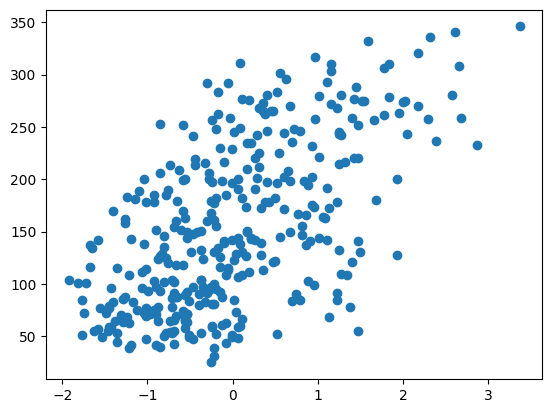

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 2], y_train)
plt.show()

In [8]:
model = BatchGradientDescent(learning_rate=0.1, epochs=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

0.4552533629348665


In [9]:
model.intercept_

153.73654387803174

In [10]:
model.coef_

array([  1.9384518 , -11.43732566,  26.26437636,  16.61371332,
       -10.19365695,  -2.11709445,  -7.47783315,   8.36042014,
        22.03740927,   2.59983829])

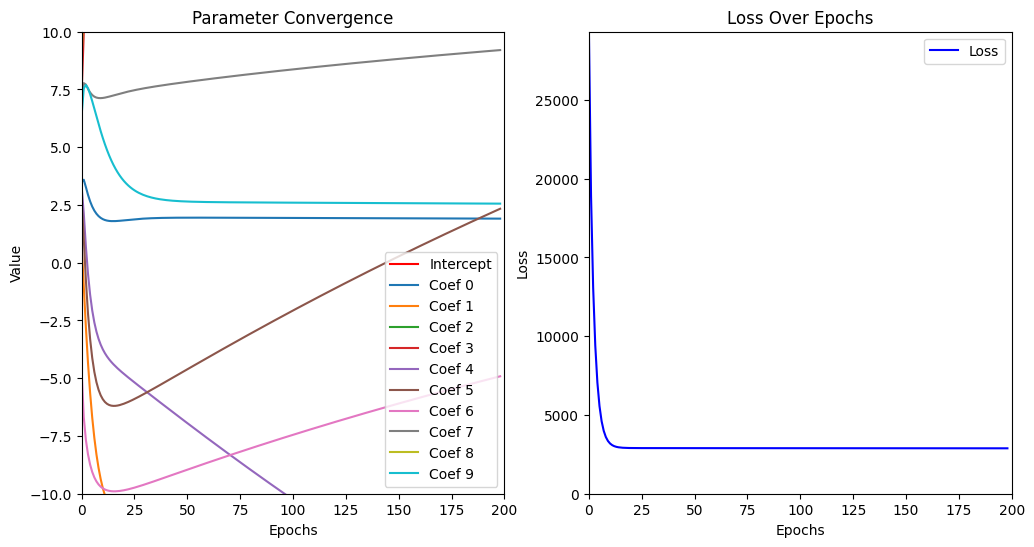

In [11]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Create and fit the model
model = BatchGradientDescent(learning_rate=0.1, epochs=200)
model.fit(X_train, y_train)

# Animation Setup
history = model.history
epochs = model.epochs

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
intercept_line, = ax[0].plot([], [], 'r-', label="Intercept")
coef_lines = [ax[0].plot([], [], label=f"Coef {i}")[0] for i in range(X_train.shape[1])]
loss_line, = ax[1].plot([], [], 'b-', label="Loss")

# Set up axes
ax[0].set_xlim(0, epochs)
ax[0].set_ylim(-10, 10)
ax[0].set_title("Parameter Convergence")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Value")
ax[0].legend()

ax[1].set_xlim(0, epochs)
ax[1].set_ylim(0, max(history["loss"]))
ax[1].set_title("Loss Over Epochs")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].legend()

def update(frame):
    # Update intercept
    intercept_line.set_data(range(frame), history["intercept"][:frame])
    
    # Update coefficients
    for i, coef_line in enumerate(coef_lines):
        coef_line.set_data(range(frame), [history["coef"][j][i] for j in range(frame)])
    
    # Update loss
    loss_line.set_data(range(frame), history["loss"][:frame])
    return [intercept_line] + coef_lines + [loss_line]

ani = FuncAnimation(fig, update, frames=epochs, interval=100, blit=True)
ani.save("bgd.gif", writer="pillow", fps=10)
plt.show()

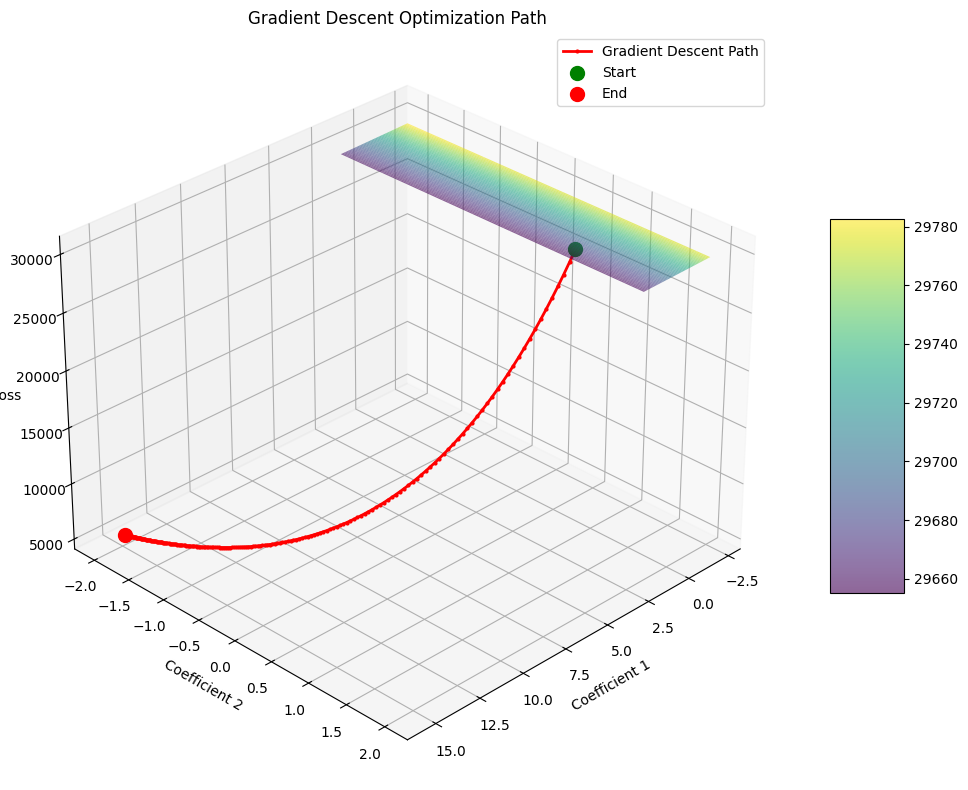

Final Loss: 5845.14
Final Coefficients: [15.3176, -1.8654]


In [12]:
# Create and fit the model with first two features
model = BatchGradientDescent(learning_rate=0.01, epochs=200)
model.fit(X_train[:, :2], y_train)

# Get history and parameters
history = model.history
epochs = model.epochs

# Create meshgrid for loss surface
coef1_range = np.linspace(-2, 2, 50)
coef2_range = np.linspace(-2, 2, 50)

coef1_mesh, coef2_mesh = np.meshgrid(coef1_range, coef2_range)
loss_surface = np.zeros_like(coef1_mesh)

# Calculate loss surface
for i in range(coef1_mesh.shape[0]):
    for j in range(coef1_mesh.shape[1]):
        coef = np.array([coef1_mesh[i, j], coef2_mesh[i, j]])
        y_hat = np.dot(X_train[:, :2], coef)
        loss_surface[i, j] = np.mean((y_train - y_hat) ** 2)

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot loss surface with better visibility
surf = ax.plot_surface(coef1_mesh, coef2_mesh, loss_surface, 
                      cmap='viridis', alpha=0.6,
                      rstride=1, cstride=1)

# Add colorbar
fig.colorbar(surf, shrink=0.5, aspect=5)

# Plot parameter trajectory
coef_history = np.array(history['coef'])
loss_history = np.array(history['loss'])

ax.plot3D(coef_history[:, 0], coef_history[:, 1], loss_history, 
          'r.-', linewidth=2, markersize=4, label='Gradient Descent Path')

# Highlight start and end points
ax.scatter(coef_history[0, 0], coef_history[0, 1], loss_history[0], 
           color='green', s=100, label='Start')
ax.scatter(coef_history[-1, 0], coef_history[-1, 1], loss_history[-1], 
           color='red', s=100, label='End')

# Set labels and title
ax.set_xlabel('Coefficient 1')
ax.set_ylabel('Coefficient 2')
ax.set_zlabel('Loss')
ax.set_title('Gradient Descent Optimization Path')
ax.legend()

# Adjust view angle for better visualization
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

# Print final loss and coefficients
print(f"Final Loss: {loss_history[-1]:.2f}")
print(f"Final Coefficients: [{coef_history[-1, 0]:.4f}, {coef_history[-1, 1]:.4f}]")